In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Feature Engineering

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [5]:
x_train[5].shape

(28, 28)

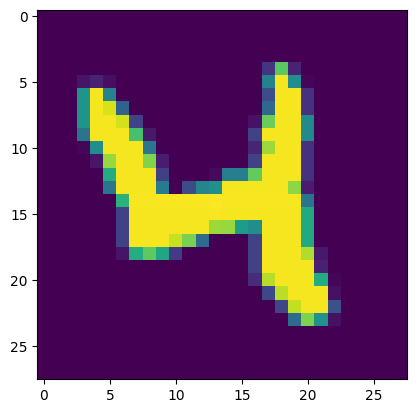

4


In [6]:
plt.imshow(x_train[20])
plt.show()
print(y_train[20])

In [7]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Model Build

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=20,)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.8471 - loss: 0.5247
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9556 - loss: 0.1511
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9674 - loss: 0.1071
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9738 - loss: 0.0836
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9790 - loss: 0.0664
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9829 - loss: 0.0554
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9847 - loss: 0.0479
Epoch 8/20
 147/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.9840 - loss: 0.0459

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_pred[0])

In [ ]:
label_img=np.argmax(y_pred[0])
print(label_img)

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

# Results

In [ ]:
matrix=confusion_matrix(y_test,y_pred_labels)
print(matrix)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(matrix,annot=True,fmt="d",cmap="Blues")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted labels")
plt.show()

# Predictive System

In [ ]:
img_input=input("Enter your image path :")
input_img=cv2.imread(img_input)
grey_img=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)
input_img_resize=cv2.resize(grey_img,(28,28))
input_img_resize=input_img_resize/255
img_reshaped=np.reshape(input_img_resize,[1,28,28])
img_pred=model.predict(img_reshaped)
img_pred_label=np.argmax(img_pred)
print("The Handwritten image is :",img_pred_label)